In [1]:
import pandas as pd
import numpy as np
import pickle
import os
from sklearn.metrics.pairwise import rbf_kernel
import pandas as pd
import numpy as np

import time
from sklearn.metrics import accuracy_score, roc_auc_score
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sb
###

# Plot settings
%config InlineBackend.figure_format = 'svg'
sb.set()
from tqdm import tqdm

import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

import sys
sys.path.insert(0, '/directory/tothe/handshakefile/')

import stylised_facts_data_utilities.createLOB as createLOB

%matplotlib inline
import os

from scipy.stats import norm, ttest_ind

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from scipy.stats import shapiro, normaltest, jarque_bera

In [2]:
def normality_tests(data_values):
    """

    :param data_values: values of returns in our case
    :return: print out a series of outcomes of whether the data fits a normal distribution or not!
    """

    stat, p = shapiro(data_values)
    print('stat = %.3f, p = %.3f\n ' % (stat, p))
    if p > 0.05:
        print('prob gaussian')
    else:
        print('non gaussian')

    stat_nt, p_nt = normaltest(data_values)

    print('stat = %.3f, p = %.3f\n ' % (stat_nt, p_nt))
    
    if p_nt > 0.05:
        print('prob gaussian')
    else:
        print('non gaussian')

    stat_jb, p_jb = jarque_bera(data_values)

    print('stat = %.3f, p = %.3f\n ' % (stat_jb, p_jb))

    if p_jb> 0.05:
        print('prob gaussian')
    else:
        print('non gaussian')

In [3]:
def quantile_plot(x, **kwargs):
    quantiles , xr = stats.probplot(x, fit= True)
    plt.scatter(xr, quantiles, **kwargs)
def returns(s):
    arr = np.diff(np.log(s))
    return (pd.Series(arr, index=s.index[1:]))

In [4]:
def open_pickle_filename(pickle_file):
    pickle_to_file = pickle.load(open(pickle_file, "rb"), encoding = "latin1")
    
    return pickle_to_file

In [5]:
dataFolder = '/media/ak/WorkDrive/Data'
figures_destination = '/home/ak/Documents/Research/Papers/figures/'

In [6]:
elementsFolder= '/media/ak/Elements/OrderBookProcessedData'
symbols = ['RX1', 'DU1', 'JB1', 'OE1', 'TU1', 'US1']

In [114]:
symbol = symbols[0]
symbolFolder = os.path.join(elementsFolder,symbol )

In [115]:
os.listdir(symbolFolder)

['RX1_20180423_consolidated_lob_clock_tick_25_cal_resample_600.pkl',
 'RX1_20180416_consolidated_lob_clock_tick_100_cal_resample_600.pkl',
 'RX1_20180416_consolidated_lob_clock_tick_150_cal_resample_600.pkl',
 'RX1_20180416_consolidated_lob_clock_tick_25_cal_resample_600.pkl',
 'RX1_20180417_consolidated_lob_clock_tick_100_cal_resample_600.pkl',
 'RX1_20180417_consolidated_lob_clock_tick_150_cal_resample_600.pkl',
 'RX1_20180417_consolidated_lob_clock_tick_25_cal_resample_600.pkl',
 'RX1_20180418_consolidated_lob_clock_tick_100_cal_resample_600.pkl',
 'RX1_20180418_consolidated_lob_clock_tick_150_cal_resample_600.pkl',
 'RX1_20180418_consolidated_lob_clock_tick_25_cal_resample_600.pkl',
 'RX1_20180419_consolidated_lob_clock_tick_100_cal_resample_600.pkl',
 'RX1_20180419_consolidated_lob_clock_tick_150_cal_resample_600.pkl',
 'RX1_20180419_consolidated_lob_clock_tick_25_cal_resample_600.pkl',
 'RX1_20180420_consolidated_lob_clock_tick_100_cal_resample_600.pkl',
 'RX1_20180420_consolidat

In [91]:
allSymbolFiles = os.listdir(symbolFolder)

sample_5 = [f for f in allSymbolFiles if str("_5_") in f]
sample_50 = [f for f in allSymbolFiles if str("_50_") in f]
sample_25 = [f for f in allSymbolFiles if str("_25_") in f]
sample_100 = [f for f in allSymbolFiles if str("_100_") in f]
sample_150 = [f for f in allSymbolFiles if str("_150_") in f]
resampling = [f for f in allSymbolFiles if str("resampling") in f]

print(len(sample_100), len(sample_150))

35 0


In [92]:
file_to_load = os.path.join(symbolFolder, sample_100[10])

In [93]:
open_pickle_filename(file_to_load)

defaultdict(dict,
            {'volume_bar': {'20180413':                BidSize_open  BidSize_high  BidSize_low  BidSize_close       QuoteTime_open       QuoteTime_high        QuoteTime_low      QuoteTime_close type_x_open type_x_high type_x_low type_x_close  BestBid_open  BestBid_high  BestBid_low  BestBid_close      TradeTime_open      TradeTime_high       TradeTime_low     TradeTime_close  AskSize_open  AskSize_high  AskSize_low  AskSize_close  BestAsk_open  BestAsk_high  BestAsk_low  BestAsk_close  TradeSize_open  TradeSize_high  TradeSize_low  TradeSize_close type_open type_high type_low type_close  TradePrice_open  TradePrice_high  TradePrice_low  TradePrice_close TimeStamp_open TimeStamp_high TimeStamp_low TimeStamp_close  TradeVolume_open  TradeVolume_high  TradeVolume_low  TradeVolume_close  total_traded_volume_open  total_traded_volume_high  total_traded_volume_low  total_traded_volume_close  milliSeconds_open  milliSeconds_high  milliSeconds_low  milliSeconds_close  dollar_

In [94]:
len(sample_25)

0

In [95]:

keys = ['volume_bar', 'calendar_bar', 'usd_volume_bar', 'tick_bar']

'_100_cal_resample_300'

In [100]:
sample_dict = {'5':sample_5,
               '25':sample_25,
               '50':sample_50,
              '100':sample_100,
              '150': sample_150}

combined_dfs_dict = {'calendar_dfs':list(),
                     'tick_dfs':list(),
                     'usd_dfs':list(),
                     'volume_dfs':list()                     
                    }
width = '50'
keys = ['volume_bar', 'calendar_bar', 'usd_volume_bar', 'tick_bar']

In [101]:
idx =0
for idx in range(0,10):
    try:
        file_to_load = os.path.join(symbolFolder, sample_dict[str(width)][idx]) #load each file

        pickled_dict = open_pickle_filename(file_to_load) #unpickle each file
        print('doing key: ', idx)

        volume_dict = pickled_dict[keys[0]] # take the volume clock
        calendar_dict = pickled_dict[keys[1]] # take teh calendar clock
        tick_dict = pickled_dict[keys[3]]
        usd_volume_dict = pickled_dict[keys[2]] # take the volume clock

        volume_dict_keys = np.unique(list(volume_dict.keys()))
        print('-~~~~~~~-------------- ')

        for date_key in volume_dict_keys:

            combined_dfs_dict['volume_dfs'].append(volume_dict[date_key])
            combined_dfs_dict['calendar_dfs'].append(calendar_dict[date_key])
            combined_dfs_dict['tick_dfs'].append(tick_dict[date_key])

            if len(usd_volume_dict[date_key])==0:
                continue
            else:
                combined_dfs_dict['usd_dfs'].append(usd_volume_dict[date_key])
    except EOFError:
        print('problem here:', idx)
        continue
    


    

doing key:  0
-~~~~~~~-------------- 
doing key:  1
-~~~~~~~-------------- 
doing key:  2
-~~~~~~~-------------- 
doing key:  3
-~~~~~~~-------------- 
doing key:  4
-~~~~~~~-------------- 
doing key:  5
-~~~~~~~-------------- 
doing key:  6
-~~~~~~~-------------- 
doing key:  7
-~~~~~~~-------------- 
doing key:  8
-~~~~~~~-------------- 
doing key:  9
-~~~~~~~-------------- 


In [102]:
hash_of_file = file_to_load.split("clock_tick")[1].split(".")[0]
hash_of_file

'_50_cal_resample_300'

In [103]:
keys = sorted(combined_dfs_dict.keys())
for i in range(0,4):
    print(keys[i],':', i)

calendar_dfs : 0
tick_dfs : 1
usd_dfs : 2
volume_dfs : 3


In [104]:
print('-------',keys[0])
df_1 = pd.concat(combined_dfs_dict[keys[0]], axis=0)
print('-------',keys[1])
df_2= pd.concat(combined_dfs_dict[keys[1]], axis=0 )
print('-------',keys[2])
df_3 = pd.concat(combined_dfs_dict[keys[2]], axis=0 )
print('-------',keys[3])
df_4 = pd.concat(combined_dfs_dict[keys[3]], axis=0 )


------- calendar_dfs
------- tick_dfs
------- usd_dfs
------- volume_dfs


In [105]:
hash_of_file =file_to_load.split("clock_tick")[1].split(".")[0]

### do the various returns ###

In [106]:
tr = returns(df_2.micro_price_close).dropna()
vr = returns(df_4.micro_price_close).dropna()
usdvr = returns(df_3.micro_price_close).dropna()
df_ret = returns(df_1.micro_price_close).dropna()   
bar_returns = [tr, vr, usdvr, df_ret]


## normalisation of returns across the different clocks

In [107]:
np.isfinite(vr.dropna()).mean()

tick_standard = (tr - tr.mean()) / tr.std()
volume_standard = (vr - vr.mean()) / vr.std()
calendar_standard = (df_ret - df_ret.mean()) / df_ret.std()
dollar_standard = (usdvr - usdvr.mean()) / usdvr.std()



In [108]:
calendar_standard

timeStampIdx
2018-04-15 22:00:00   -2.079887
2018-04-15 22:05:00    2.017881
2018-04-15 22:10:00    0.055412
2018-04-15 22:15:00   -2.027252
2018-04-15 22:20:00    0.092391
                         ...   
2018-04-23 23:35:00   -0.055084
2018-04-23 23:40:00    0.017714
2018-04-23 23:45:00    0.026331
2018-04-23 23:50:00    0.021759
2018-04-23 23:55:00    0.035508
Length: 70145, dtype: float64

/home/ak/anaconda3/envs/mmd-kernels/lib/python3.7/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/home/ak/anaconda3/envs/mmd-kernels/lib/python3.7/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.55 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/home/ak/anaconda3/envs/mmd-kernels/lib/python3.7/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


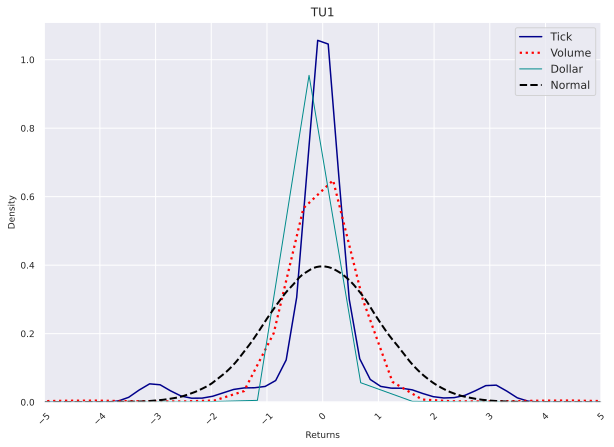

In [109]:
import seaborn as sns

bar_returns = [tr, vr, df_ret]
bar_types = ['tick','volume','calendar']


fig, ax = plt.subplots(figsize=(10,7))
#sns.kdeplot(time_standard, label="Time", bw=0.30, color='darkred')
sns.kdeplot(tick_standard, 
            ax=ax,
            label="Tick", 
            bw=0.25,
            color='darkblue')
sns.kdeplot(volume_standard,
            ax=ax,
            label="Volume",
            bw=0.55,linewidth=2.25,
            color='red', linestyle =':')
sns.kdeplot(dollar_standard,
            ax=ax,
            label="Dollar",
            bw=0.25,
            linewidth=1,
            color='darkcyan')
sns.kdeplot(np.random.normal(size=len(tick_standard)),
            ax=ax,
            label="Normal",
            color='black',
            linewidth=2,
            linestyle="--")

_=ax.set_xticks(range(-5, 6))
_=ax.set_xlim(-5, 5)
plt.xlabel('Returns', fontsize=9)
plt.ylabel('Density', fontsize=9)
plt.xticks(fontsize = 9, rotation = 45)
plt.yticks(fontsize = 9)
plt.title(str(symbol))
plt.legend()
file_name = symbol+'_'+str(hash_of_file) +str(width) + '_multiclocks_density_plot.png'
plt.savefig(os.path.join(figures_destination,file_name))

plt.show()


In [110]:
hash_of_file

'_50_cal_resample_300'

In [111]:
normality_tests(tick_standard)
print('----------------------------')
normality_tests(volume_standard)
print('----------------------------')
normality_tests(calendar_standard)

/home/ak/anaconda3/envs/mmd-kernels/lib/python3.7/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stat = 0.687, p = 0.000
 
non gaussian
stat = 167947.275, p = 0.000
 
non gaussian
stat = 25074556.584, p = 0.000
 
non gaussian
----------------------------
stat = 0.257, p = 0.000
 
non gaussian
stat = 4483482.175, p = 0.000
 
non gaussian
stat = 9614672463.071, p = 0.000
 
non gaussian
----------------------------
stat = 0.777, p = 0.000
 
non gaussian
stat = 52747.727, p = 0.000
 
non gaussian
stat = 8664579.727, p = 0.000
 
non gaussian
